# Trabajo No.4
## Comparación
#### integrantes:Jose Foronda y Alexa Paternina

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
df = pd.read_csv('datosenergeticos.csv', sep=',')

X = df.drop('Type_of_Renewable_Energy', axis=1)
y = df['Type_of_Renewable_Energy']

X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#para SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01, 0.001]
}

svm_grid = GridSearchCV(svm_pipe, param_grid_svm, cv=3, error_score='raise')
try:
    svm_grid.fit(X_train, y_train)
except ValueError as e:
    print(f"Error al ajustar SVM: {e}")

if hasattr(svm_grid, 'best_params_'):
    best_params_svm = svm_grid.best_params_
    best_model_svm = svm_grid.best_estimator_

In [30]:
#para el modelo  Random Forest
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20]
}
rf_grid = GridSearchCV(rf_pipe, param_grid_rf, cv=3, error_score='raise')
rf_grid.fit(X_train, y_train)
best_params_rf = rf_grid.best_params_
best_model_rf = rf_grid.best_estimator_

In [31]:
# Evaluar los modelos en el conjunto de prueba
y_pred_svm = best_model_svm.predict(X_test)
y_pred_rf = best_model_rf.predict(X_test)

In [33]:
 # Imprimir métricas de evaluación
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Support Vector Machine:
              precision    recall  f1-score   support

           1       0.15      0.46      0.23        59
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00        63
           5       0.15      0.72      0.25        57
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        64

    accuracy                           0.15       450
   macro avg       0.04      0.17      0.07       450
weighted avg       0.04      0.15      0.06       450

Random Forest:
              precision    recall  f1-score   support

           1       0.12      0.17      0.14        59
           2       0.07      0.04      0.05        77
           3       0.10      0.15      0.12        59
           4       0.15      0.16      0.15        63
           5       0.22      0.37      0.27        57
           6       0.11      0.07      

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


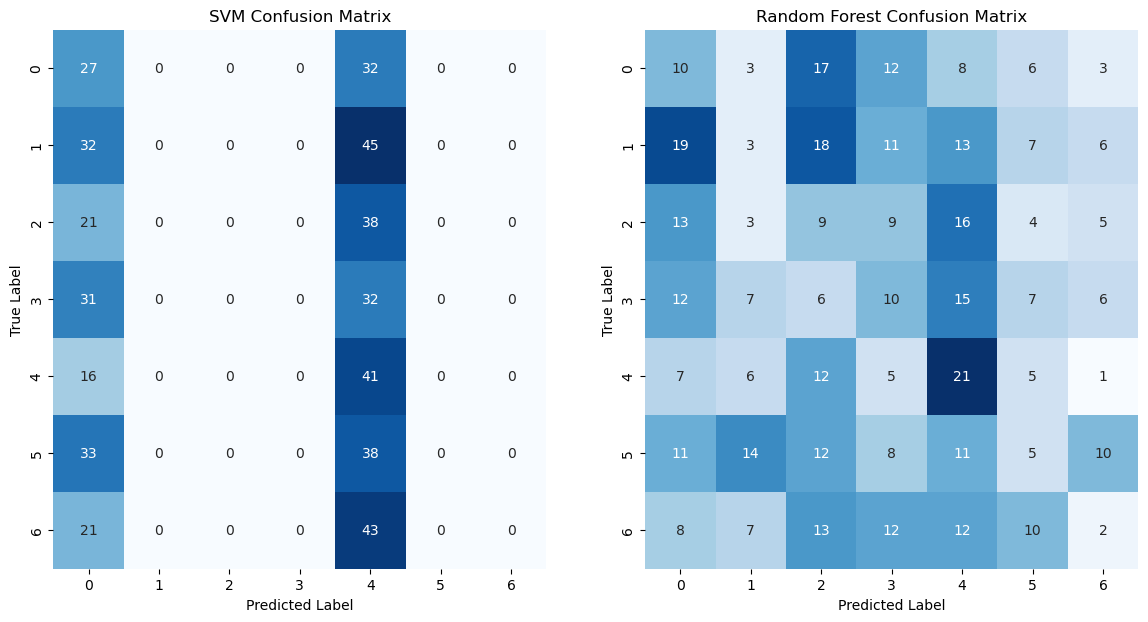

In [38]:
#Para Comparar el desempeño de los modelos
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()
